In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv
/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_zipcode_population.csv
/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_data_dictionary.csv


# Exploratory Data Analysis

Initial View look at Raw Data:

In [2]:
df = pd.read_csv("/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


### What type of information is in the dataset?

In [3]:
for column in df.columns:
    print(f"Column: {column}, Type: {df[column].dtype}")

Column: Customer ID, Type: object
Column: Gender, Type: object
Column: Age, Type: int64
Column: Married, Type: object
Column: Number of Dependents, Type: int64
Column: City, Type: object
Column: Zip Code, Type: int64
Column: Latitude, Type: float64
Column: Longitude, Type: float64
Column: Number of Referrals, Type: int64
Column: Tenure in Months, Type: int64
Column: Offer, Type: object
Column: Phone Service, Type: object
Column: Avg Monthly Long Distance Charges, Type: float64
Column: Multiple Lines, Type: object
Column: Internet Service, Type: object
Column: Internet Type, Type: object
Column: Avg Monthly GB Download, Type: float64
Column: Online Security, Type: object
Column: Online Backup, Type: object
Column: Device Protection Plan, Type: object
Column: Premium Tech Support, Type: object
Column: Streaming TV, Type: object
Column: Streaming Movies, Type: object
Column: Streaming Music, Type: object
Column: Unlimited Data, Type: object
Column: Contract, Type: object
Column: Paperless

The customer status will be the target label of the predictive model.

### How many rows are there in this dataset?

In [4]:
len(df)

7043

### How much data is missing?

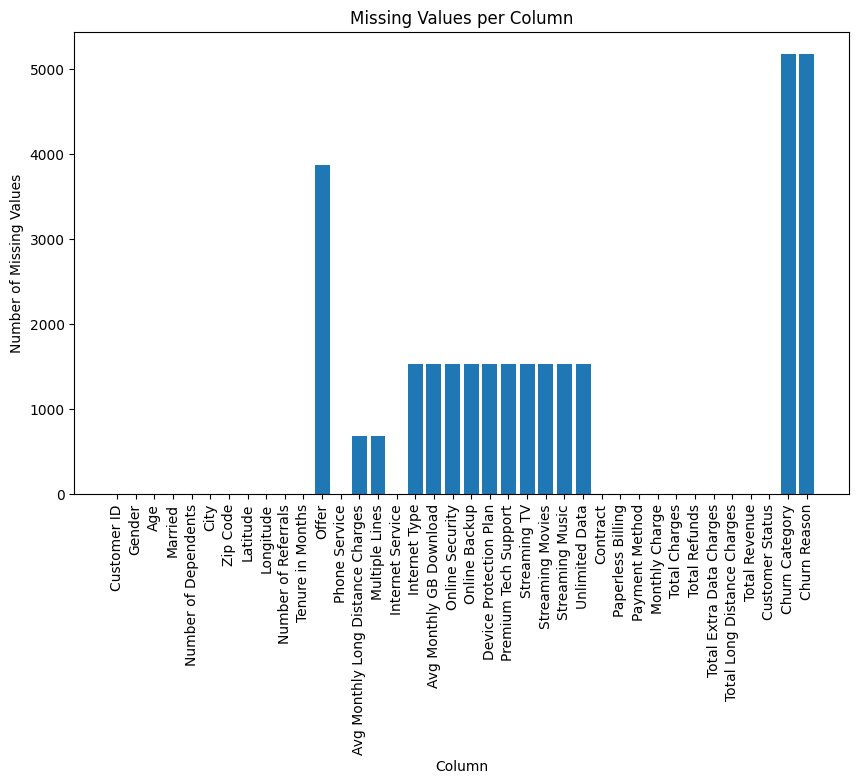

In [5]:
import matplotlib.pyplot as plt
missing_values = df.isna().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']

plt.figure(figsize=(10, 6))
plt.bar(missing_values['Column'], missing_values['Missing Values'])
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.xticks(rotation=90) 
plt.show()

### Dealing With Missing Values

The offer column has the type of offer the user accepted, but not all users accepted offers. So a new category needs to be made for users that did not accept an offer.

<Axes: >

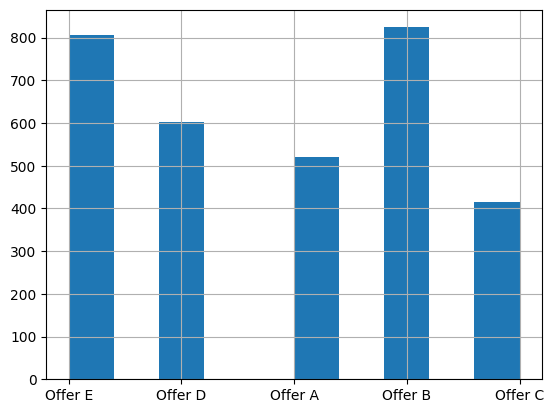

In [6]:
df['Offer'].hist()

There are missing values in columns with information related to internet services because some users do not have internet services. We can see this by looking at the values of these users when they do not have internet service.

In [7]:
df[df["Internet Service"] == "No"][["Internet Type", "Avg Monthly GB Download","Online Security","Online Backup","Device Protection Plan","Premium Tech Support","Streaming TV","Streaming Movies","Streaming Music","Unlimited Data"]]  

,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are also missing values in columns related to mobile services because not all users have mobile service.

In [8]:
df[df["Phone Service"] == "No"][["Avg Monthly Long Distance Charges", "Multiple Lines"]]  

,Avg Monthly Long Distance Charges,Multiple Lines
10,NaN,NaN
14,NaN,NaN
16,NaN,NaN
19,NaN,NaN
25,NaN,NaN
...,...,...
6979,NaN,NaN
6980,NaN,NaN
6996,NaN,NaN
7016,NaN,NaN


In [9]:
df["Offer"] = df["Offer"].fillna("None")
df["Internet Type"] = df["Internet Type"].fillna("None")
df["Avg Monthly GB Download"] = df["Avg Monthly GB Download"].fillna(0)
df["Online Security"] = df["Online Security"].fillna("No")
df["Online Backup"] = df["Online Backup"].fillna("No")
df["Device Protection Plan"] = df["Device Protection Plan"].fillna("No")
df["Premium Tech Support"] = df["Premium Tech Support"].fillna("No")
df["Streaming TV"] = df["Streaming TV"].fillna("No")
df["Streaming Movies"] = df["Streaming Movies"].fillna("No")
df["Streaming Music"] = df["Streaming Music"].fillna("No")
df["Unlimited Data"] = df["Unlimited Data"].fillna("No")
df["Avg Monthly Long Distance Charges"] = df["Avg Monthly Long Distance Charges"].fillna(0)
df["Multiple Lines"] = df["Multiple Lines"].fillna("No")

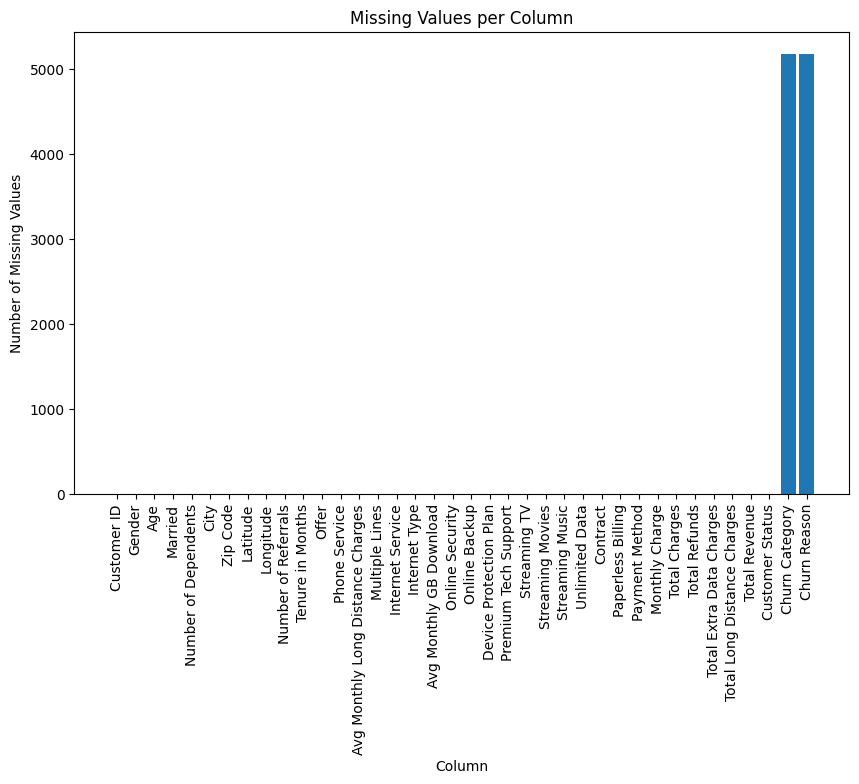

In [10]:
missing_values = df.isna().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']

plt.figure(figsize=(10, 6))
plt.bar(missing_values['Column'], missing_values['Missing Values'])
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.xticks(rotation=90) 
plt.show()

The last two missing value categories will not be used for predictions so they will be dropped.

In [11]:
df = df.drop(columns = ["Customer ID", "Churn Category", "Churn Reason"])

### Visualizing Numerical Data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of Dependents'}>,
        <Axes: title={'center': 'Zip Code'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Number of Referrals'}>,
        <Axes: title={'center': 'Tenure in Months'}>,
        <Axes: title={'center': 'Avg Monthly Long Distance Charges'}>],
       [<Axes: title={'center': 'Avg Monthly GB Download'}>,
        <Axes: title={'center': 'Monthly Charge'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Refunds'}>],
       [<Axes: title={'center': 'Total Extra Data Charges'}>,
        <Axes: title={'center': 'Total Long Distance Charges'}>,
        <Axes: title={'center': 'Total Revenue'}>, <Axes: >]],
      dtype=object)

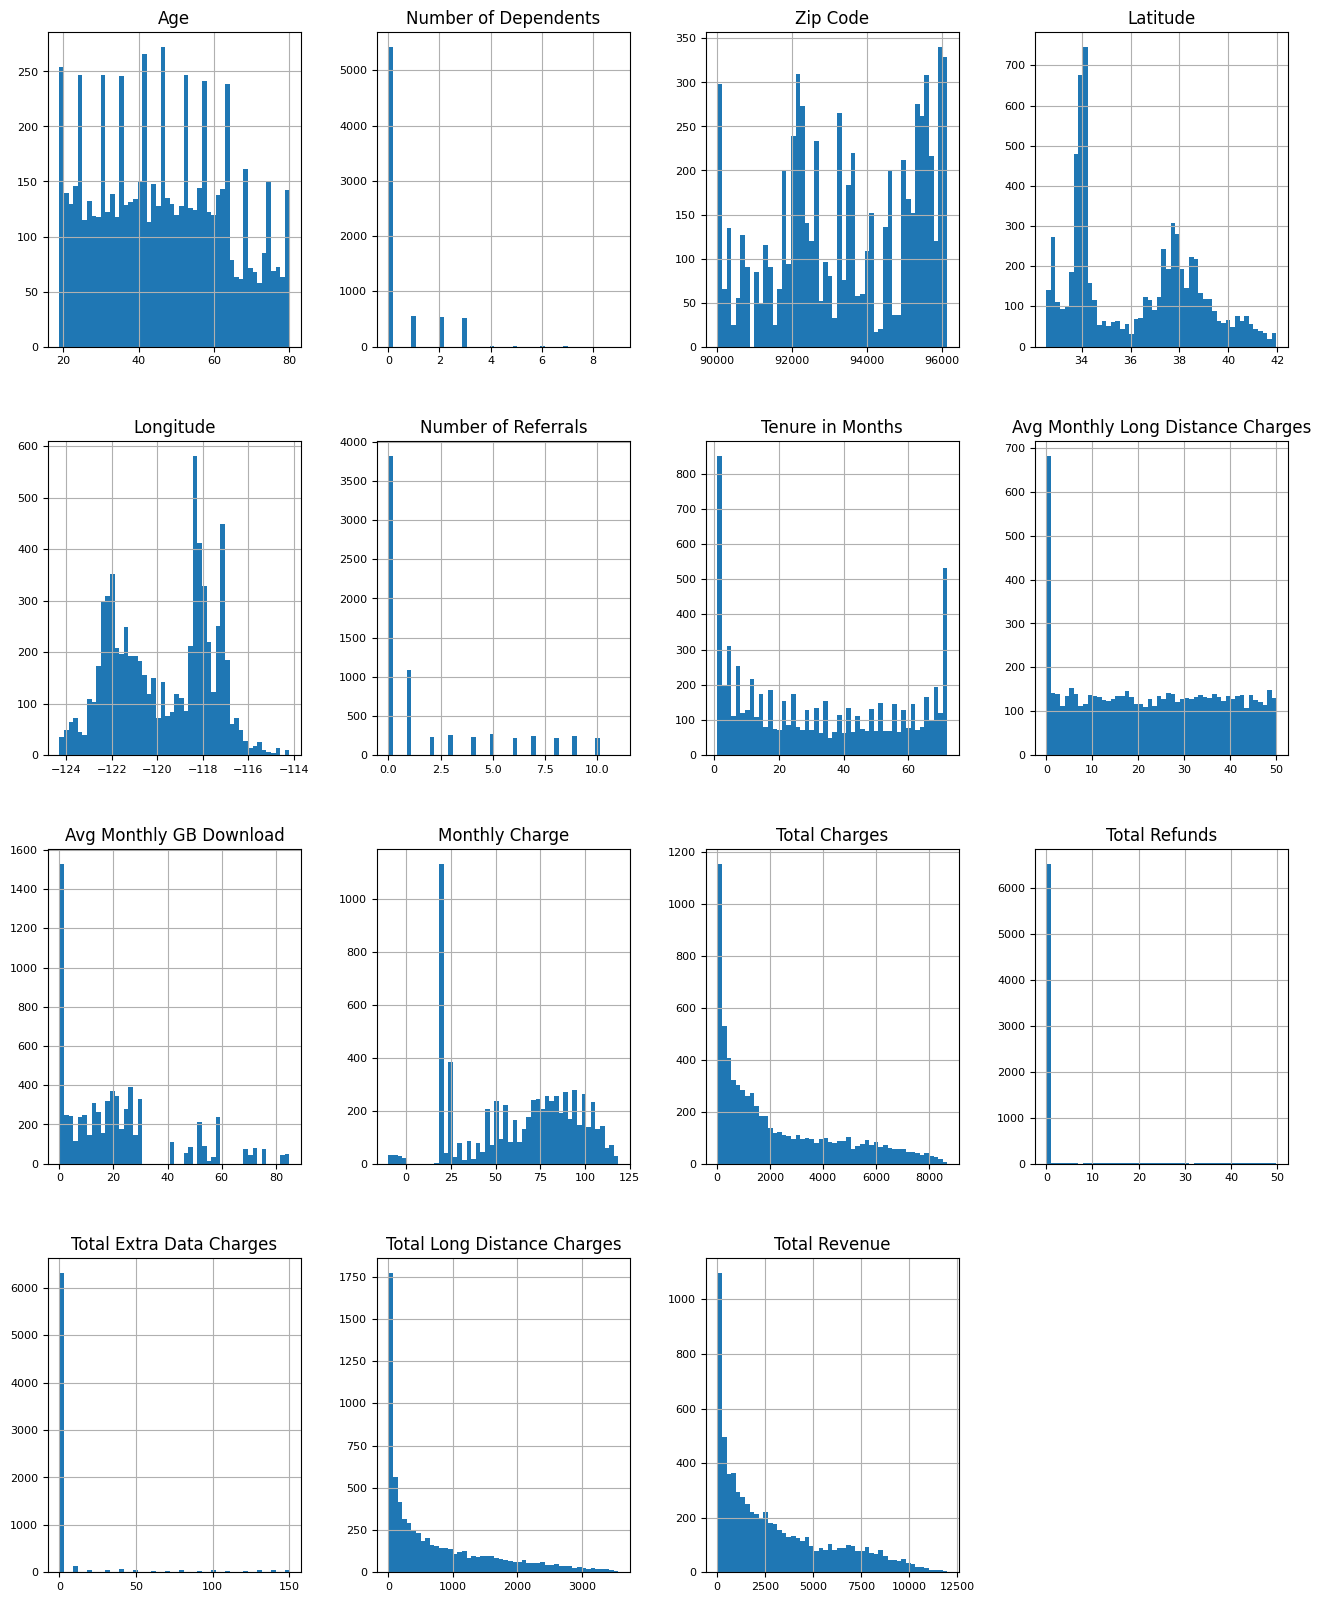

In [12]:
df.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

# Preprocessing

- The columns with yes or no will be converted to 0's and 1's. 
- Zip Code, Longitude and Latitude will be removed as it adds no useful information.
- City will be frequency encoding to capture data about the popularity of the telcom company in each city.
- Categorical data like offers, contract, internet type and payment methods will be one hot encoded.
- The target variable customer status is label encoded

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

processed_df = df.copy()

# Drop irrelevant columns
processed_df = processed_df.drop(columns = ["Zip Code", "Longitude", "Latitude"])

# Convert Female and Male to 0's and 1's
processed_df['Gender'] = processed_df['Gender'].map({"Female": 0, "Male": 1})

# Map yes and no to 0's and 1's
yes_no_columns = [
    'Married',
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data',
    'Paperless Billing'
]

yes_no_map = {"Yes": 1, "No": 0}

for column in yes_no_columns:
    processed_df[column] = processed_df[column].map(yes_no_map)

# Frequency Encoding Cities
city_frequency = processed_df['City'].value_counts().to_dict()
processed_df['City'] = processed_df['City'].map(city_frequency)

# Label Encoding Target Variable
label_encoder = LabelEncoder()
processed_df['Customer Status'] = label_encoder.fit_transform(processed_df['Customer Status'])

# One Hot Encode
one_hot_encoder = OneHotEncoder()

processed_df.head()

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,8,2,9,None,1,42.39,...,One Year,1,Credit Card,65.6,593.30,0.00,0,381.51,974.81,2
1,1,46,0,0,40,0,9,None,1,10.69,...,Month-to-Month,0,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,2
2,1,50,0,0,8,0,4,Offer E,1,33.65,...,Month-to-Month,1,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,4,1,13,Offer D,1,27.82,...,Month-to-Month,1,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,8,3,3,None,1,7.38,...,Month-to-Month,1,Credit Card,83.9,267.40,0.00,0,22.14,289.54,0


### Building One Hot Encoding and Train-Test Split

In [14]:
categorical_columns = ['Offer', 'Contract', 'Payment Method', "Internet Type"]

processor = ColumnTransformer(
    transformers = [
        ("cat", one_hot_encoder, categorical_columns)
    ],
    remainder = "passthrough"
)

processor.fit(processed_df.drop(columns=['Customer Status']))


X = processor.transform(processed_df.drop(columns = ['Customer Status']))
colnames = [col.replace('remainder__', "") for col in processor.get_feature_names_out()]
colnames = [col.replace('cat__Offer_', '') for col in colnames]
colnames = [col.replace('None', 'No Offer') for col in colnames] 
colnames = [col.replace('cat__', '') for col in colnames] 
X = pd.DataFrame(X, columns=colnames)

X = X.drop(columns = ['Internet Type_No Offer'])

y = processed_df[['Customer Status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Building xGBoost Model

In [15]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(max_depth = 5)

In [16]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# Model Evaluation

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       374
           1       0.74      0.69      0.72        91
           2       0.91      0.93      0.92       944

    accuracy                           0.85      1409
   macro avg       0.79      0.77      0.78      1409
weighted avg       0.85      0.85      0.85      1409

Accuracy: 0.8516678495386799


# Explainable AI Analysis

In [18]:
import shap

# Calculating Shap values on GPU for faster performance
booster_xgb = xgb_model.get_booster()

shap_values_xgb = booster_xgb.predict(xgb.DMatrix(X_train, y_train), pred_contribs = True)

shap_values_xgb = shap_values_xgb[:, :, :-1]

### Most Important Features to Class 0

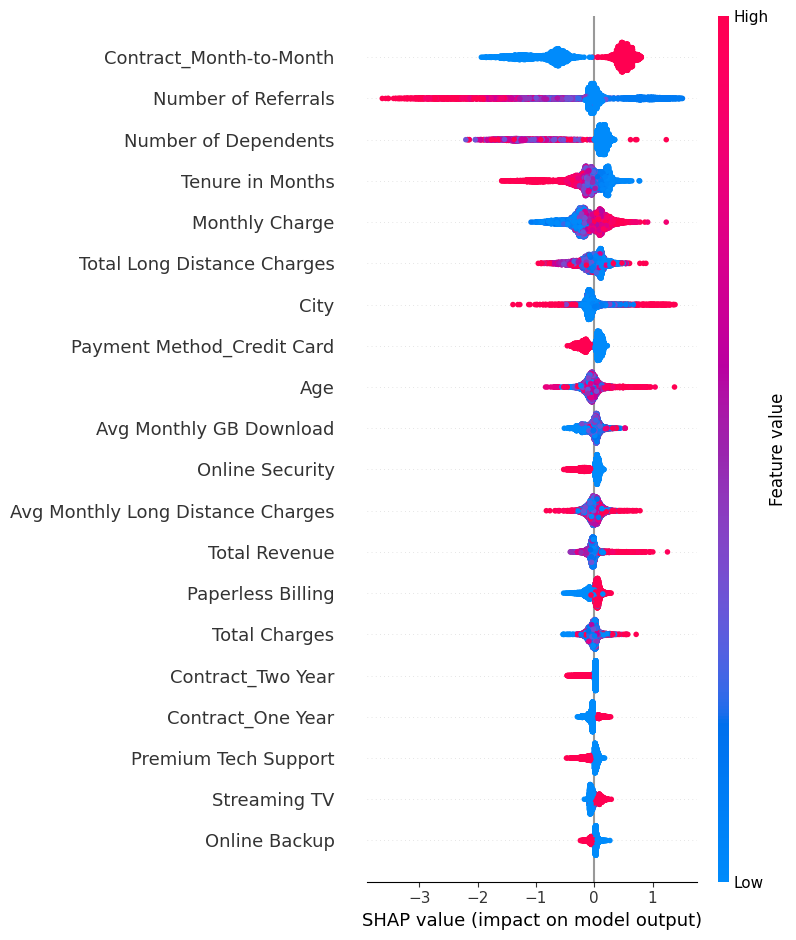

In [19]:
shap.summary_plot(
    shap_values_xgb[:,0,:],
    X_train,
    feature_names = X_train.columns
)

### Most Important Features to Class 1

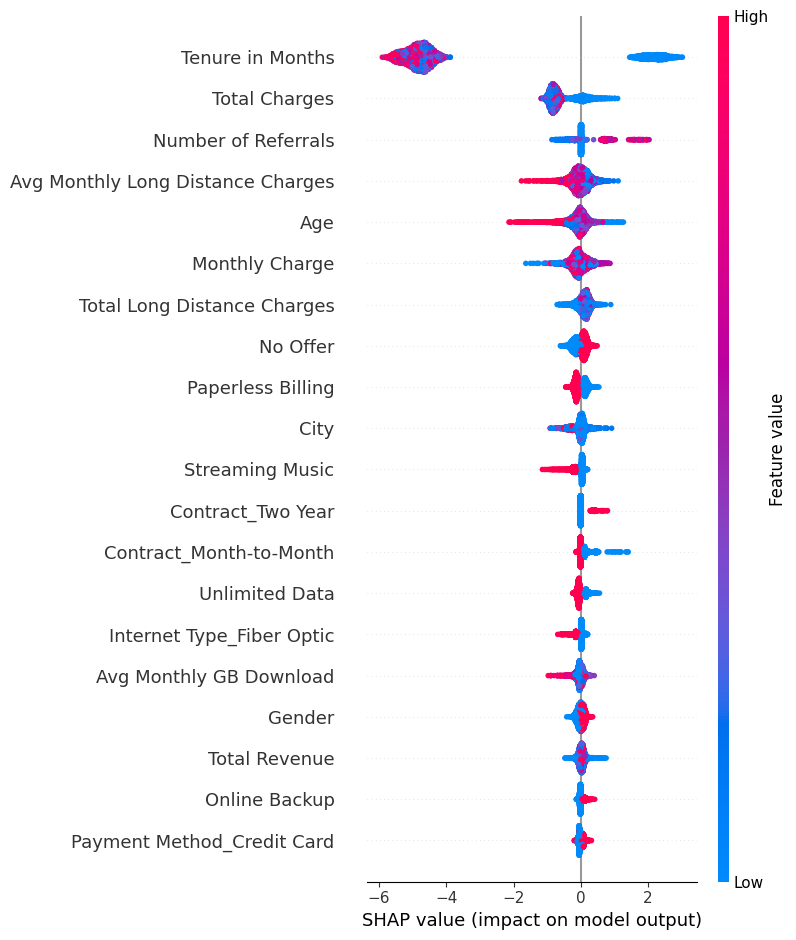

In [20]:
shap.summary_plot(
    shap_values_xgb[:,1,:],
    X_train,
    feature_names = X_train.columns
)

### Most Important Features to Class 2

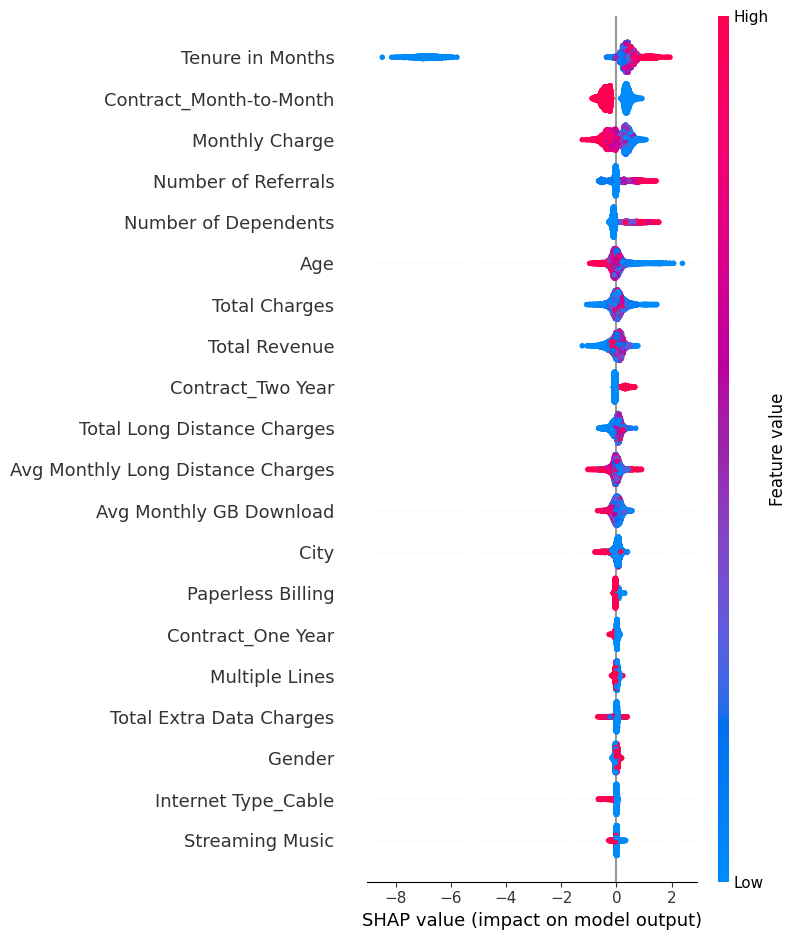

In [21]:
shap.summary_plot(
    shap_values_xgb[:,2,:],
    X_train,
    feature_names = X_train.columns
)